# Problem Objective :
As the ML Developer assigned to the HR Department, you have been asked to 
create ML programs to:
1. Perform data quality checks by checking for missing values, if any.
2. Understand what factors contributed most to employee turnover at EDA.
3. Perform clustering of employees who left based on their satisfaction and 
evaluation.
4. Handle the left Class Imbalance using the SMOTE technique.
5. Perform k-fold cross-validation model training and evaluate performance. 
6. Identify the best model and justify the evaluation metrics used. 
7. Suggest various retention strategies for targeted employees.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## Perform the following steps:
1. Perform data quality checks by checking for missing values, if any

In [2]:
Employee_df=pd.read_csv('HR_comma_sep.csv')
Employee_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
Employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2. Understand what factors contributed most to employee turnover at EDA.
   
   2.1. Draw a heatmap of the correlation matrix between all numerical features or columns in the data.

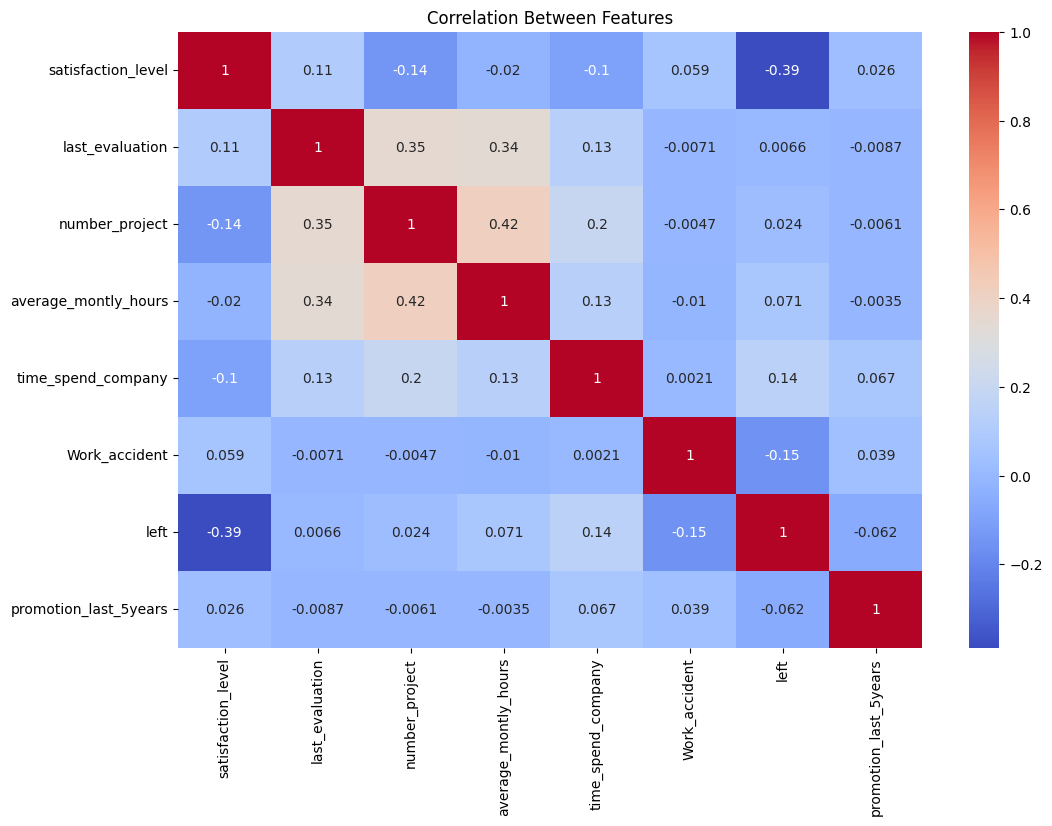

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(Employee_df.select_dtypes(include='number').corr(),annot=True,cmap="coolwarm")
plt.title('Correlation Between Features')
plt.show()

2.2. Draw the distribution plot of:

■ Employee Satisfaction (use column satisfaction_level)

■ Employee Evaluation (use column last_evaluation)

■ Employee Average Monthly Hours (use column 
average_montly_hours)


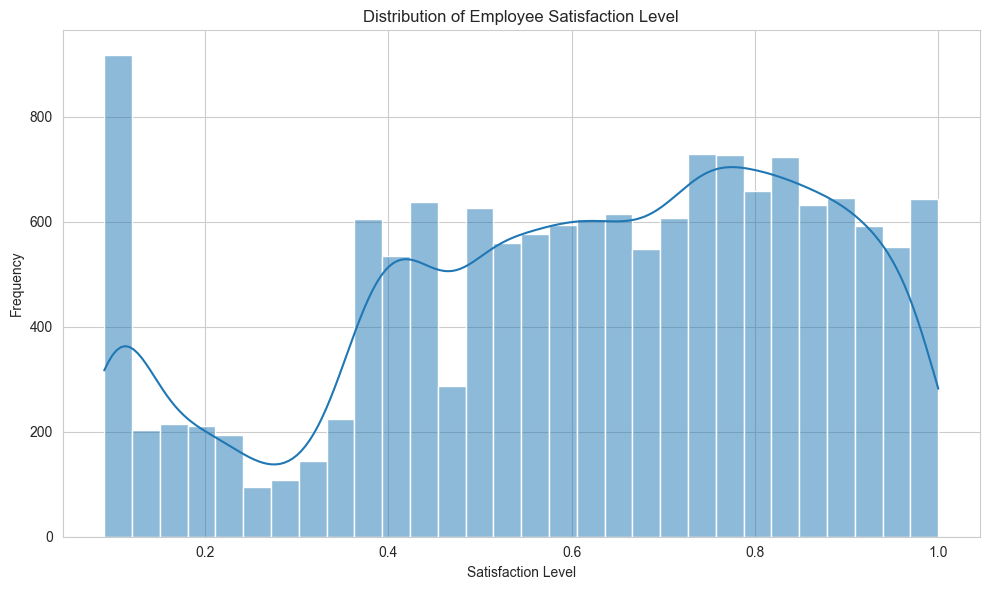

In [5]:
# Set plot style
sns.set_style("whitegrid")

# --- Plot distribution for Employee Satisfaction ---
plt.figure(figsize=(10, 6))
sns.histplot(Employee_df['satisfaction_level'], kde=True, bins=30) # Using histplot with KDE overlay
plt.title('Distribution of Employee Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.tight_layout() # Adjust layout
plt.show()

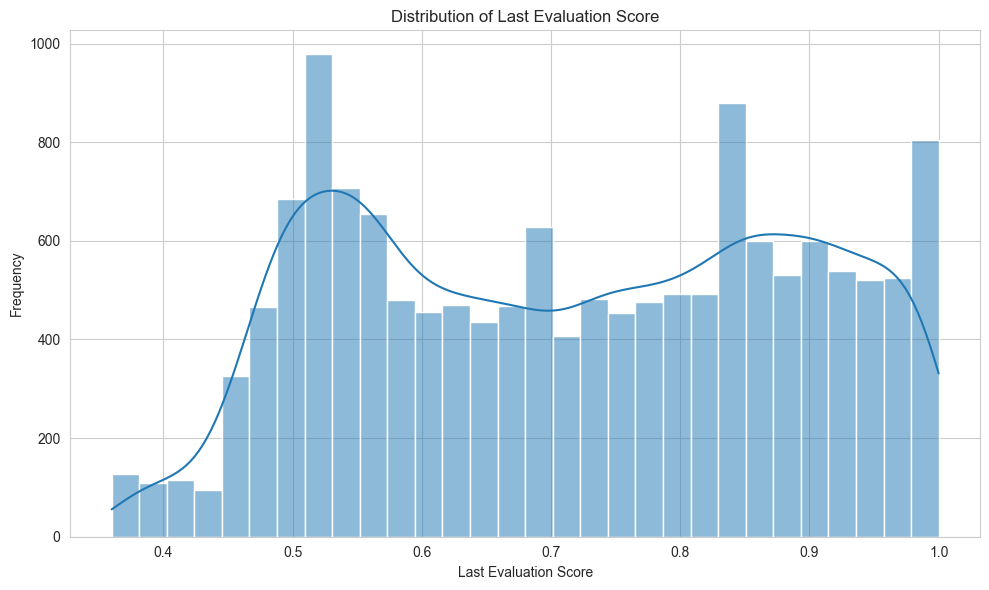

In [6]:
# --- Plot distribution for Employee Evaluation ---
plt.figure(figsize=(10, 6))
# Check if the column exists before plotting

sns.histplot(Employee_df['last_evaluation'], kde=True, bins=30)
plt.title('Distribution of Last Evaluation Score')
plt.xlabel('Last Evaluation Score')
plt.ylabel('Frequency')
plt.tight_layout() # Adjust layout
plt.show()
  

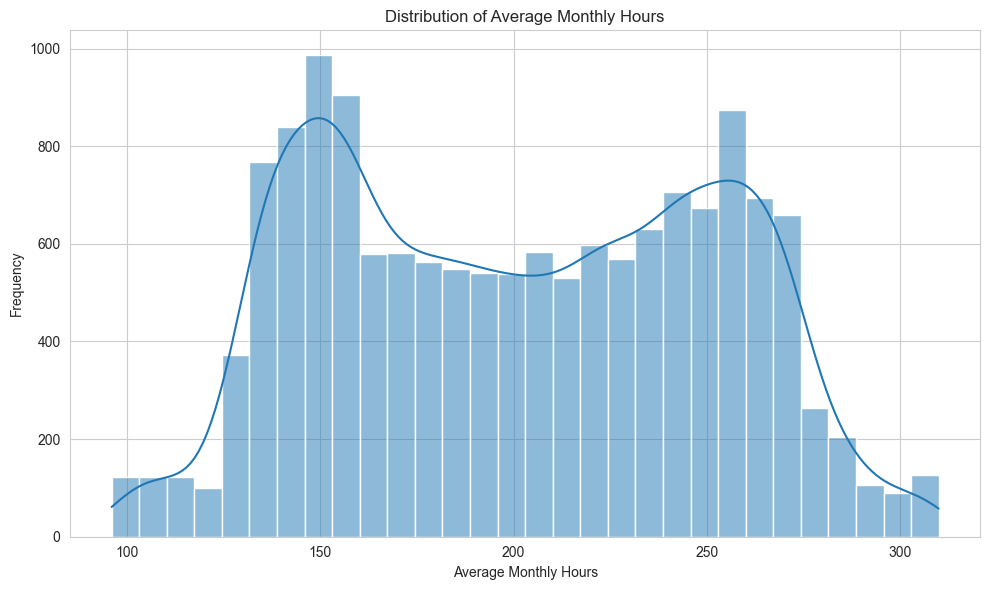

In [7]:
# --- Plot distribution for Average Monthly Hours ---
plt.figure(figsize=(10, 6))

sns.histplot(Employee_df['average_montly_hours'], kde=True, bins=30)
plt.title('Distribution of Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.tight_layout() # Adjust layout
plt.show()

2.3. Draw the bar plot of the employee project count of both employees
who left and stayed in the organization (use column number_project 
and hue column left), and give your inferences from the plot

Text(0, 0.5, 'Employees count in the projects')

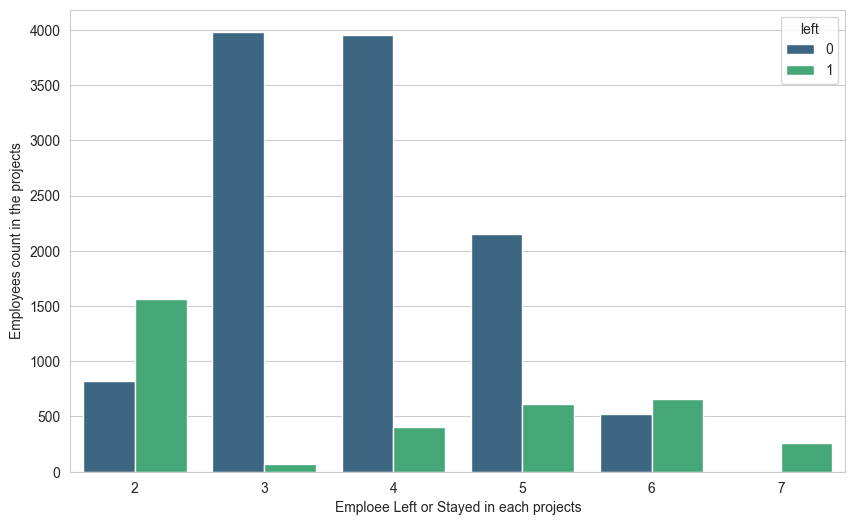

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='number_project', hue='left', data=Employee_df, palette='viridis')
plt.xlabel("Emploee Left or Stayed in each projects")
plt.ylabel("Employees count in the projects")

3. Perform clustering of employees who left based on their satisfaction and evaluation.

   3.1. Choose columns satisfaction_level, last_evaluation, and left. 

In [9]:
EmployeeLeft_satisEval_df =Employee_df[['satisfaction_level','last_evaluation','left']]
EmployeeLeft_satisEval_df

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


3.2. Do K-means clustering of employees who left the company into 3 
clusters?

In [10]:
from sklearn.cluster import KMeans
kmeans_model=KMeans(n_clusters=3,verbose=1)

In [11]:
kmeans_model.fit(EmployeeLeft_satisEval_df)

Initialization complete
Iteration 0, inertia 1142.1460000000013.
Iteration 1, inertia 953.1005297516263.
Iteration 2, inertia 903.1200468968652.
Iteration 3, inertia 879.3169116157944.
Iteration 4, inertia 871.1170572696956.
Iteration 5, inertia 868.8537650964747.
Iteration 6, inertia 868.2619138913008.
Iteration 7, inertia 868.0683483564692.
Iteration 8, inertia 867.9920158638598.
Converged at iteration 8: center shift 1.9915638351506257e-06 within tolerance 9.083641126891425e-06.


KMeans(n_clusters=3, verbose=1)

In [12]:
kmeans_model.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [13]:
EmployeeLeft_satisEval_df['Cluster_Labels']=kmeans_model.labels_
EmployeeLeft_satisEval_df

C:\Users\Keert\AppData\Local\Temp\ipykernel_14956\236733746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EmployeeLeft_satisEval_df['Cluster_Labels']=kmeans_model.labels_


,satisfaction_level,last_evaluation,left,Cluster_Labels
0,0.38,0.53,1,1
1,0.80,0.86,1,1
2,0.11,0.88,1,1
3,0.72,0.87,1,1
4,0.37,0.52,1,1
...,...,...,...,...
14994,0.40,0.57,1,1
14995,0.37,0.48,1,1
14996,0.37,0.53,1,1
14997,0.11,0.96,1,1


In [14]:
EmployeeLeft_satisEval_df['Cluster_Labels'].value_counts()

Cluster_Labels
0    6761
2    4667
1    3571
Name: count, dtype: int64

3.3. Based on the satisfaction and evaluation factors, give your thoughts 
on the employee clusters.

<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

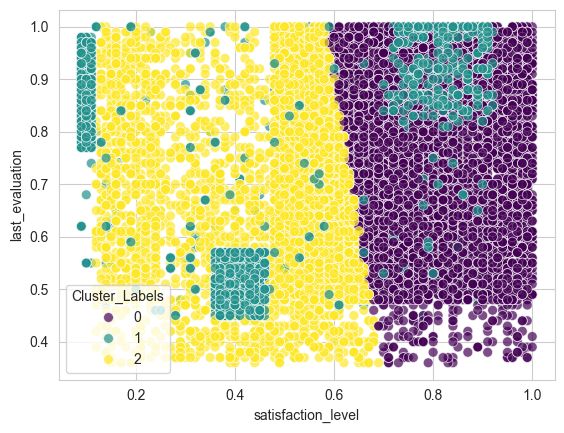

In [15]:
#Visualize the clusters
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='Cluster_Labels', data=EmployeeLeft_satisEval_df, palette='viridis', s=50, alpha=0.7)

### Inferences
Here's the interpretation of the clusters based on their position on the Satisfaction vs. Evaluation graph:

1. Cluster 0 (Purple Points):
Location: Concentrated in the bottom-right area.
Characteristics: High satisfaction_level (roughly > 0.7) but Low last_evaluation (roughly < 0.55).
Thoughts: This is an interesting and somewhat counter-intuitive group among those who left. They reported being satisfied but were rated poorly in their evaluations.


2. Cluster 1 (Teal/Green Points):
Location: Occupies three distinct regions, but primarily characterized by low satisfaction:
Top-left corner: Very low satisfaction (< 0.2) and high evaluation (> 0.75).
Top-right corner: Very High-mid satisfaction (> 0.8) and high-mid evaluation (>0.8).
Middle-left patch: Low-to-mid satisfaction (approx 0.35-0.45) and low/mid evaluation (approx 0.45-0.55).


3. Cluster 2 (Yellow Points):
Location: Predominantly in the upper-right area, extending somewhat down the middle.
Characteristics: High satisfaction_level (mostly > 0.6) and High last_evaluation (mostly > 0.6, often very high).
Thoughts: These are the employees who appeared to be both satisfied and performing well before they left. Their departure is often unexpected based solely on these metrics. 

4. Handle the left Class Imbalance using the SMOTE technique.
   
4.1. Pre-process the data by converting categorical columns to numerical columns by:
   - Separating categorical variables and numeric variables
   - Applying get_dummies() to the categorical variables
   - Combining categorical variables and numeric variables

In [16]:
#Seperate categorical and numerical variables
Emp_Numeric_df=Employee_df.select_dtypes(include=['int64', 'float64'])
Emp_Categorical_df=Employee_df.select_dtypes(include=['object', 'category','bool'])
print("Numerical cols", Emp_Numeric_df)
print("Categorical cols", Emp_Categorical_df)

Numerical cols        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       

NOTE: The question says to seperate the cat and num cols and encode categorical cols to numerical cols and then combine both cat and numerical cols instead I am encoding the categorical cols in the main dataframe itself without seperating cat and num cols and after encoding i am dropping the obj columns

In [17]:
#Encode the categorical to numerical
#perform Label Encoding to salary column as it has a order
le = LabelEncoder()
Employee_df['salary_encoded'] = le.fit_transform(Employee_df['salary'])
Employee_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,1
14995,0.37,0.48,2,160,3,0,1,0,support,low,1
14996,0.37,0.53,2,143,3,0,1,0,support,low,1
14997,0.11,0.96,6,280,4,0,1,0,support,low,1


In [18]:
#Perform one hot encoding for sales column as it is nominal
Employee_df_encoded= pd.get_dummies(Employee_df, columns=['sales'], drop_first=True,dtype='int')
Employee_df_encoded.drop('salary',axis=1,inplace=True)
Employee_df_encoded

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_encoded,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,1,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,1,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,1,0,0,0,0,0,0,0,1,0


4.2. Do the stratified split of the dataset to train and test in the ratio 80:20 
with random_state=123.

In [19]:
# Separate features and target first:
y = Employee_df_encoded['left']
X = Employee_df_encoded.drop('left', axis=1)  # 'left' is often the target in turnover datasets

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=123)

4.3. Upsample the train dataset using the SMOTE technique from the 
imblearn module

You should use SMOTE if your target variable is imbalanced — for example, if most employees in your dataset stayed (left = 0) and very few left (left = 1). This imbalance can bias your machine learning model to always predict the majority class, resulting in poor performance on minority class predictions. NOTE: But, we should perform SMOTE only on train data not test data.

In [21]:
y.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [22]:
# Initialize SMOTE
smote = SMOTE(random_state=123)

# Apply SMOTE to training data only
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution
from collections import Counter
print("Original y_train distribution:", Counter(y_train))
print("After SMOTE y_train distribution:", Counter(y_train_smote))

Original y_train distribution: Counter({0: 9137, 1: 2862})
After SMOTE y_train distribution: Counter({0: 9137, 1: 9137})
